# Import

In [ ]:
import os
!pip install rtree
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
os.chdir("/content/spatialindex-src-1.8.5")
!./configure
!make
!make install
!ldconfig

In [ ]:
import pandas as pd
!pip install geopandas
import geopandas
!pip install contextily
import contextily as ctx

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
giardini= geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/parchi.geojson')
giardini

In [6]:
quartieri= geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm')
quartieri

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15419 45.43707, ..."
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10295 45.48939, ..."
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15724 45.48721, ..."
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16687 45.52027, ..."
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ..."
...,...,...,...,...,...,...,...,...,...
83,68,PAGANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5221.836696,1.289686e+06,172,"POLYGON ((9.17174 45.47619, 9.17150 45.47595, ..."
84,2,BRERA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5461.667196,1.637333e+06,173,"POLYGON ((9.19165 45.46906, 9.19105 45.46843, ..."
85,33,ROGOREDO - SANTA GIULIA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6012.496435,1.200116e+06,174,"POLYGON ((9.24044 45.44427, 9.24084 45.44424, ..."
86,17,ADRIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9276.875747,2.433358e+06,175,"POLYGON ((9.26729 45.51234, 9.26701 45.51241, ..."


In [7]:
quartieri= quartieri.to_crs(epsg=4326)

# 1

In [8]:
grd_qrt= geopandas.sjoin(giardini,quartieri,op='intersects',how='left')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


In [10]:
nil_imp=input('')
qrt_ins=grd_qrt[grd_qrt.NIL==nil_imp]
qrt_ins[['NIL','LOCALITA','SPECIFICA_LOCALITA']]

TRENNO


,NIL,LOCALITA,SPECIFICA_LOCALITA
3648,TRENNO,Aldo Aniasi,ex parco di Trenno
3649,TRENNO,Aldo Aniasi,ex parco di Trenno
3650,TRENNO,Aldo Aniasi,ex parco di Trenno
3651,TRENNO,Aldo Aniasi,ex parco di Trenno
3652,TRENNO,Aldo Aniasi,ex parco di Trenno
...,...,...,...
6295,TRENNO,Aldo Aniasi,ex parco di Trenno
6296,TRENNO,Aldo Aniasi,ex parco di Trenno
6297,TRENNO,Aldo Aniasi,ex parco di Trenno
6298,TRENNO,Aldo Aniasi,ex parco di Trenno


# 2

In [11]:
grd_qrt= geopandas.sjoin(giardini,quartieri,op='intersects',how='left')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


In [12]:
elenco=grd_qrt[['VIA','LOCALITA','SPECIFICA_LOCALITA']]
elenco

,VIA,LOCALITA,SPECIFICA_LOCALITA
0,giardino,Fallaci Oriana,area verde di via Crivelli - Quadronno
1,giardino,Fallaci Oriana,area verde di via Crivelli - Quadronno
2,giardino,Fallaci Oriana,area verde di via Crivelli - Quadronno
3,giardino,Fallaci Oriana,area verde di via Crivelli - Quadronno
4,giardino,Fallaci Oriana,area verde di via Crivelli - Quadronno
...,...,...,...
6367,parco della,Torre,giardino a scomputo compreso tra le vie Sarca ...
6368,parco della,Torre,giardino a scomputo compreso tra le vie Sarca ...
6369,parco della,Torre,giardino a scomputo compreso tra le vie Sarca ...
6370,parco della,Torre,giardino a scomputo compreso tra le vie Sarca ...


# 3

In [13]:
grd_qrt= geopandas.sjoin(giardini,quartieri,op='intersects',how='left')
num= grd_qrt.groupby('NIL')['LOCALITA'].count().reset_index()
num1= num.sort_values(ascending= True, by= 'LOCALITA')[['NIL','LOCALITA']]
num1

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


,NIL,LOCALITA
22,GRECO - SEGNANO,12
12,CITTA' STUDI,12
41,PARCO NORD,12
39,PARCO DELLE ABBAZIE,12
37,PAGANO,12
...,...,...
50,Q.RE GALLARATESE - Q.RE SAN LEONARDO - LAMPUGNANO,228
38,PARCO BOSCO IN CITTA',240
34,NIGUARDA - CA' GRANDA - PRATO CENTENARO - Q.RE...,240
1,AFFORI,252


# 4

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


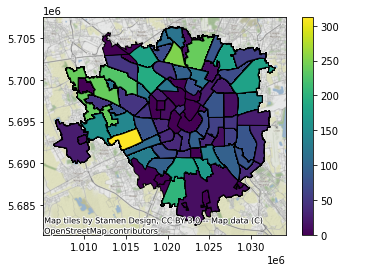

In [14]:
grd_qrt= geopandas.sjoin(quartieri,giardini,op='intersects',how='left')
num= grd_qrt.groupby('NIL')['LOCALITA'].count().reset_index()
giardini_qrt= pd.merge(grd_qrt,num, how='inner',on=['NIL'])
giardini_qrt
ax=giardini_qrt.to_crs(epsg=3857).plot(column='LOCALITA_y',legend=True, edgecolor='k')
ctx.add_basemap(ax)